## Exploration of features that affect airline passenger satisfaction

**Table of Contents**
1. [EDA and Preprocessing](#1.-eda-and-preprocessing)
2. [K-Means](#2.-k-Means)
3. [PCA](#3.-pca)
4. [Simple Logistic Regression](#4.-simple-logistic-regression)
5. [Summary](#5.-summary)

**Data Source**
- Kaggle [https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction/data]
- Data provided has been split into train and test.

**Introduction**
- This is an optional assignment for CSE-6040 course. My objective is to explore concepts and tools used in the module to *understand what features affect airline passenger satisfaction most*.
- I will first do simple EDA and preprocessing, then K-means and PCA for unsupervised learning to analyse patterns and feature importance, and finally try simple logistic regression on both basic features and PCA transformed features.
- My preliminary hypothesis is that flight delays are the main factor due to the inconvenience and stress caused, followed by travel class (business or economy).

## 1. EDA and Preprocessing

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

In [3]:
train.head(5)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


Most of the features are ordinal with ratings from 1 to 5. There are some numeric and categorical features as well.

In [4]:
test.head(5)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [5]:
print(train.shape)
print(test.shape)

(103904, 25)
(25976, 25)


There are 25 features

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [7]:
train.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [8]:
test.isnull().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


Missing values for "Arrival Delay in Minutes" found.

In [9]:
train.duplicated().sum()

0

In [10]:
test.duplicated().sum()

0

No duplicates found.

## Preprocesssing

**Preprocessing:**
- rename headers for better consistency
- remapping features with 2 values to 1 and 0 (e.g. male and female gender)
- remapping "class" with 3 values to ordinal (business > eco plus > eco)

In [11]:
def preprocess_dataset_part1(dataset: pd.DataFrame) -> pd.DataFrame:
    """
    Preprocesses the given dataset by cleaning and transforming certain columns:
    - Converts all column names to lower case and replaces spaces with underscores.
    - Drops the 'unnamed: 0' and 'id' columns.
    - Maps categorical variables like 'gender', 'customer_type', 'type_of_travel', 'class',
      and 'satisfaction' to binary/ordinal values.
    
    Args:
        dataset (pd.DataFrame): The data frame containing the dataset to be preprocessed.
    
    Returns:
        pd.DataFrame: The preprocessed dataset with modified column names and values.
    """
    dataset.columns = [col.lower().replace(' ', '_') for col in dataset.columns]

    dataset.drop(columns=['unnamed:_0', 'id'], inplace=True)

    dataset['gender'] = dataset['gender'].map({'Male': 1, 'Female': 0})
    dataset['customer_type'] = dataset['customer_type'].map({'Loyal Customer': 1, 'disloyal Customer': 0})
    dataset['type_of_travel'] = dataset['type_of_travel'].map({'Business travel': 1, 'Personal Travel': 0})
    dataset['class'] = dataset['class'].map({'Business': 2, 'Eco Plus': 1, 'Eco': 0})
    dataset['satisfaction'] = dataset['satisfaction'].map({'satisfied': 1, 'neutral or dissatisfied': 0})
    return dataset

In [12]:
preprocess_dataset_part1(train)
train.head()

,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,gate_location,...,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,1,1,13,0,1,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,1,0,25,1,2,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,0,1,26,1,2,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,0,1,25,1,2,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,1,1,61,1,2,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


In [13]:
preprocess_dataset_part1(test)
test.head()

,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,gate_location,...,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,0,1,52,1,0,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,1
1,0,1,36,1,2,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,1
2,1,0,20,1,0,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,0
3,1,1,44,1,2,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,1
4,0,1,49,1,0,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,1


## EDA

In [14]:
def barplot_feature(dataset: pd.DataFrame, feature: str, title: str) -> None:
    """
    Plots a barplot for the specified feature from the given dataset.

    Args:
        dataset (pd.DataFrame): The DataFrame containing the data.
        feature (str): The column name in the dataset to be plotted.
        title (str): The title of the plot.

    Returns:
        None: Displays a plot.
    """
    plt.figure(figsize=(8, 6))
    sns.countplot(data=dataset, x=feature, hue=feature, palette='coolwarm')
    plt.title(title, fontsize=20)
    plt.xlabel(feature)
    plt.ylabel('Count')

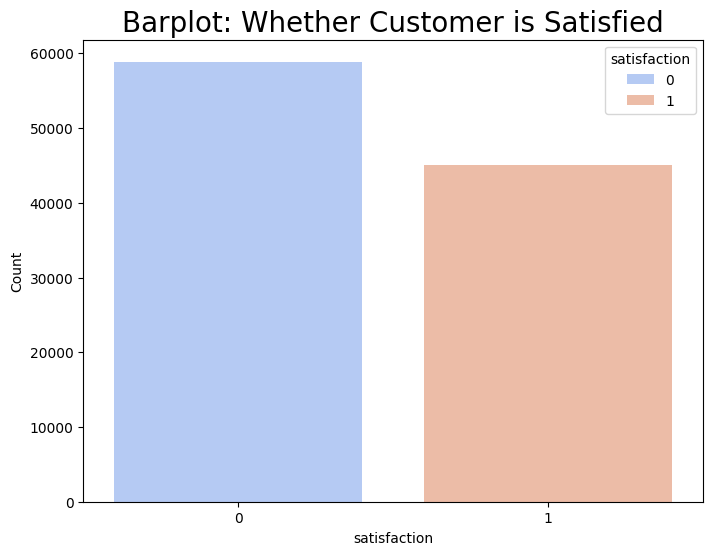

In [15]:
barplot_feature(train, 'satisfaction', 'Barplot: Whether Customer is Satisfied')

Satisfaction classes are quite balanced.

In [16]:
def barplot_variable_w_satisfaction(dataset: pd.DataFrame, variable: str) -> None:
    """
    Plots a barplot showing the distribution of a specific variable against customer satisfaction levels.

    Args:
        dataset (pd.DataFrame): The DataFrame containing the data.
        variable (str): The name of the variable in the dataset to plot.

    Returns:
        None: Displays a plot.
    """
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(data=dataset, x=variable, hue='satisfaction', palette='coolwarm')

    plt.title(f'Distribution of {variable} by Satisfaction', fontsize=20)
    plt.xlabel(variable.capitalize())
    plt.ylabel('Count')
    plt.legend(title='Satisfied')
    ax.grid(False)

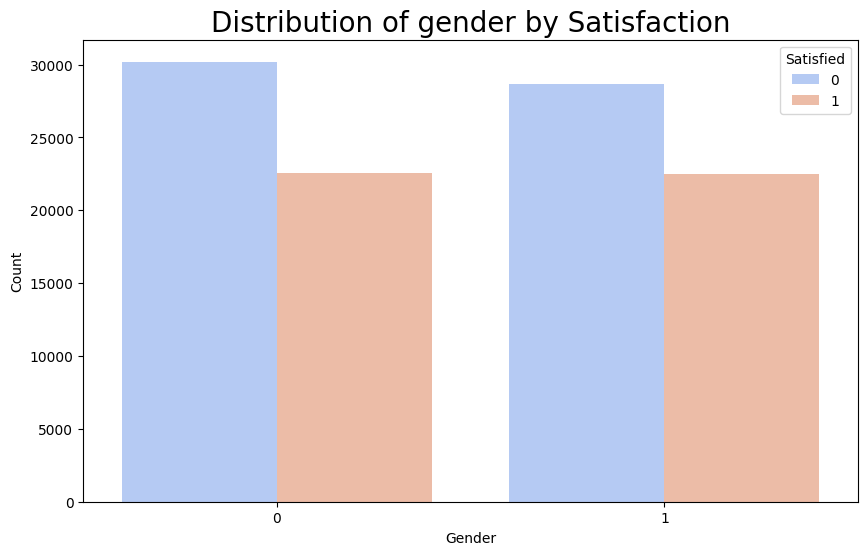

In [17]:
barplot_variable_w_satisfaction(train, "gender")

Not much difference for male vs female in terms of proportion that are satisfied. **We can drop this feature.**

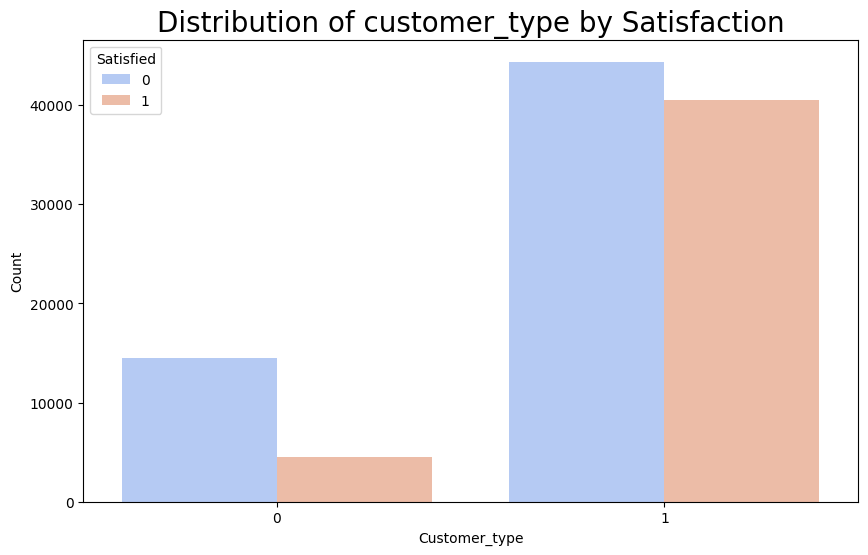

In [18]:
barplot_variable_w_satisfaction(train, "customer_type")

More loyal customers (1) than disloyal customers (0) and they show a higher proportion of satisfaction. 

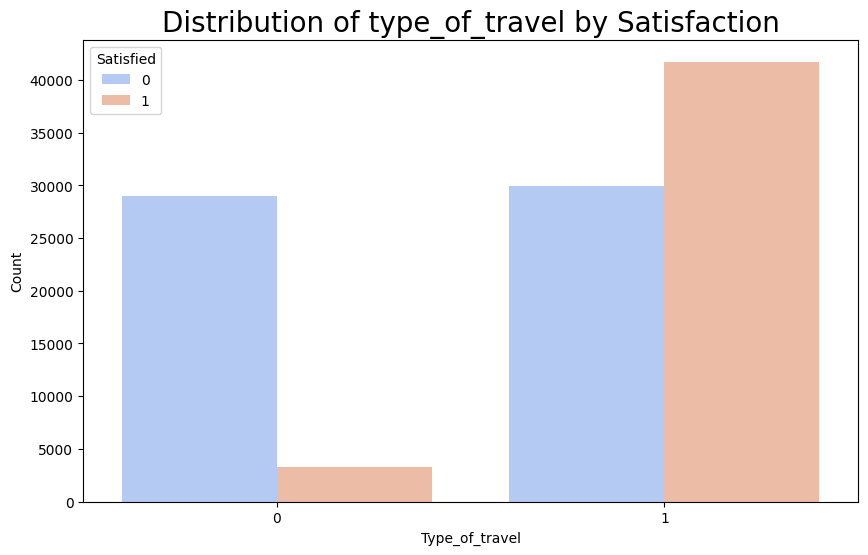

In [19]:
barplot_variable_w_satisfaction(train, "type_of_travel")

Business travel (1) show a higher proportion of satisfaction than personal travel (0). This could be because more of them take business class flights.

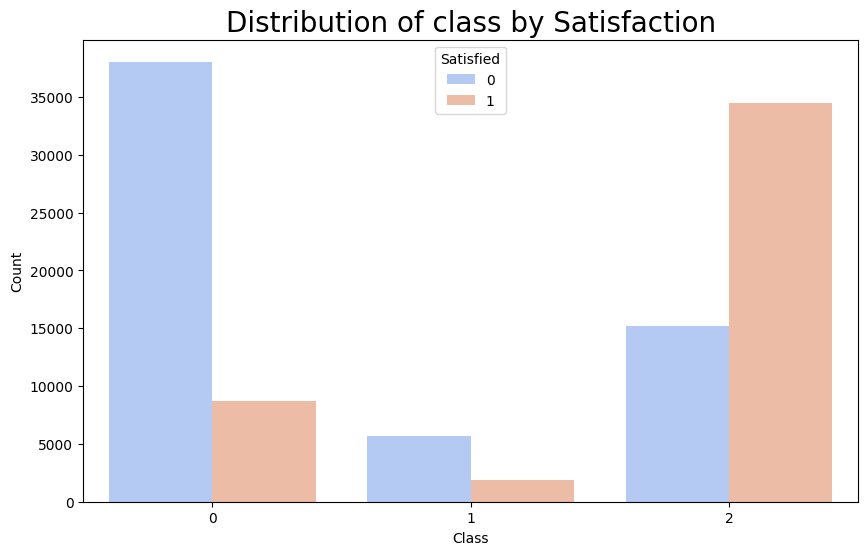

In [20]:
barplot_variable_w_satisfaction(train, "class")

Business class (2) shows a higher proportion of satisfaction than Ecoplus (1) and Eco (0), which is expected.

Proportion for Ecoplus (1) and Eco (0) are roughly the same. Quick exploration (not shown in this notebook) of combining these two into one class (effectively Business and Economy) shows no difference in performance, so will leave it this way.

In [21]:
def correlation_heatmap(dataset: pd.DataFrame) -> None:
    """
    Generates a heatmap representing the correlation matrix of the features.

    Args:
        dataset (pd.DataFrame): The DataFrame containing numerical data.

    Returns:
        None: Displays a heatmap plot.
    """
    corr = dataset.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    plt.figure(figsize=(10, 8))
    sns.heatmap(round(corr, 2), annot=True, annot_kws={"fontsize": 8}, vmin=-1, vmax=1, cmap='coolwarm', mask=mask)

    plt.title('Correlation Heatmap between Features', fontsize=20)
    plt.xticks(rotation=45, ha='right')
    plt.grid(False)
    plt.show()

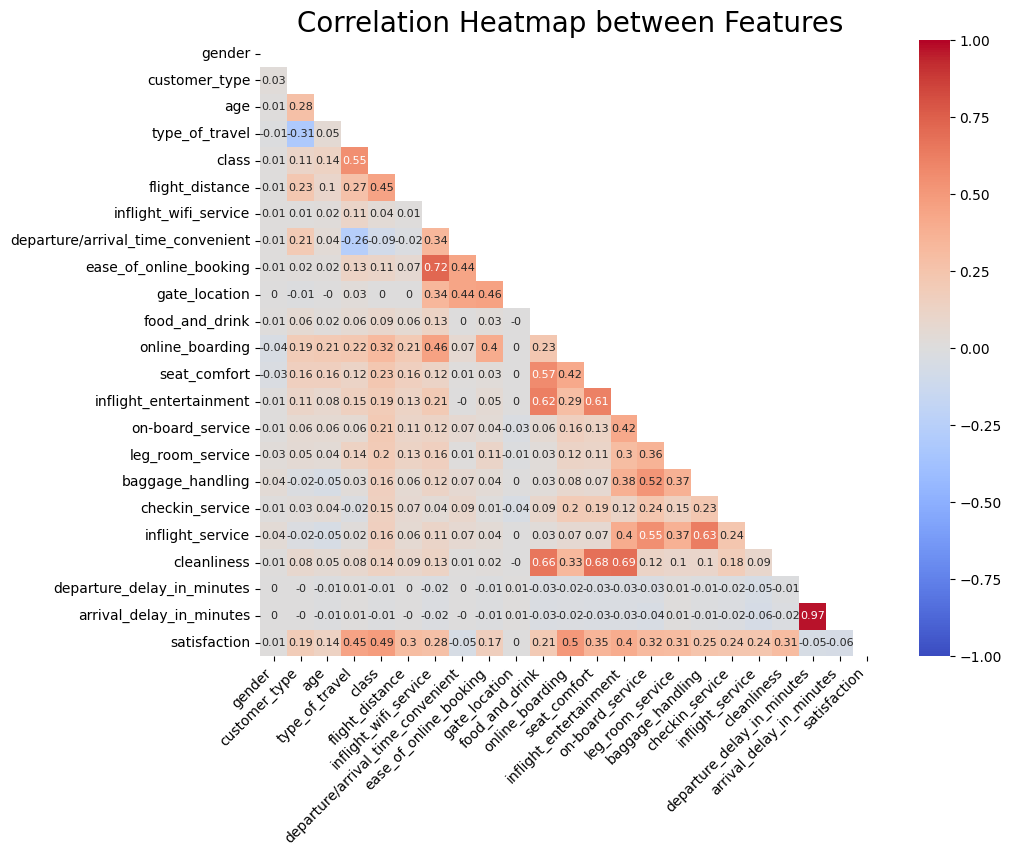

In [22]:
correlation_heatmap(train)

Strong correlation (97%) found for Departure / Arrival delay. We will explore this using a scatterplot below.

Cleaniness / Food & Drink / Seat Comfort and Flight Entertainment seems to have quite strong correlation as well.

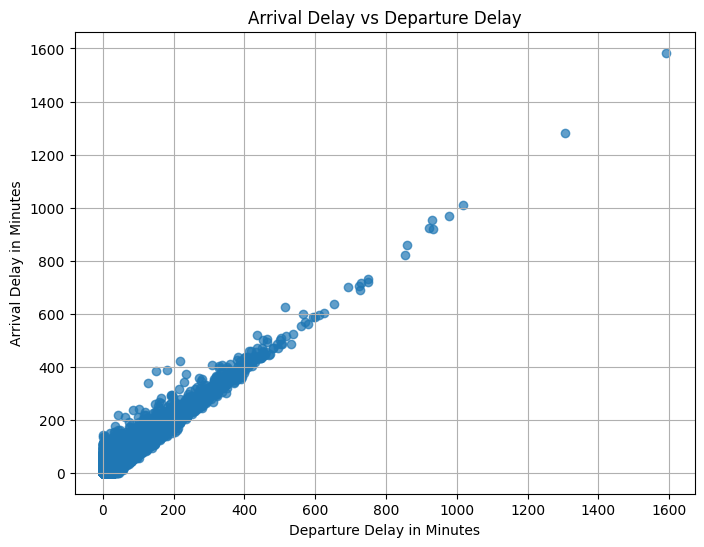

In [23]:
plt.figure(figsize=(8, 6))
plt.scatter(train['departure_delay_in_minutes'], train['arrival_delay_in_minutes'], alpha=0.7)
plt.title('Arrival Delay vs Departure Delay')
plt.xlabel('Departure Delay in Minutes')
plt.ylabel('Arrival Delay in Minutes')
plt.grid(True)
plt.show()

Strong correlation between departure and arrival delay, which makes sense. If a flight departs later, it should arrive later, assuming it takes the travel time.

Could either fill missing values for arrival delay using departure delay values, or drop it. **Will drop arrival delay feature** since departure delay already has a strong correlation.

**Further preprocessing:**
- drop gender and arrival delay features
- split dataset into features and target for k-means, PCA and logistic regression prediction later. We don't want the target variable to influence the unsupervised learning findings.

In [24]:
def preprocess_dataset_part2(dataset: pd.DataFrame) -> tuple[pd.DataFrame, pd.Series]:
    """
    Further preprocesses the dataset by 
    - removing specified columns
    - separating the feature set from the target variable.

    Args:
        dataset (pd.DataFrame): The DataFrame that contains the dataset.

    Returns:
        pd.DataFrame, pd.Series: A tuple containing the feature and target variables.
    """
    dataset.drop(columns=['gender', 'arrival_delay_in_minutes'], inplace=True)

    X_dataset = dataset.drop('satisfaction', axis=1)
    y_dataset = dataset['satisfaction']
    return X_dataset, y_dataset

In [25]:
X_train, y_train = preprocess_dataset_part2(train)
X_test, y_test = preprocess_dataset_part2(test)

In [26]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(103904, 20)
(103904,)
(25976, 20)
(25976,)


In [27]:
X_train.columns

Index(['customer_type', 'age', 'type_of_travel', 'class', 'flight_distance',
       'inflight_wifi_service', 'departure/arrival_time_convenient',
       'ease_of_online_booking', 'gate_location', 'food_and_drink',
       'online_boarding', 'seat_comfort', 'inflight_entertainment',
       'on-board_service', 'leg_room_service', 'baggage_handling',
       'checkin_service', 'inflight_service', 'cleanliness',
       'departure_delay_in_minutes'],
      dtype='object')

In [28]:
numeric_features = ['age', 'departure_delay_in_minutes', 'flight_distance']
ordinal_features = [
    'inflight_wifi_service', 
    'departure/arrival_time_convenient',
    'ease_of_online_booking', 
    'gate_location', 
    'food_and_drink',
    'online_boarding', 
    'seat_comfort', 
    'inflight_entertainment',
    'on-board_service', 
    'leg_room_service', 
    'baggage_handling',
    'checkin_service', 
    'inflight_service', 
    'cleanliness',
    ]
numeric_and_ordinal_features = numeric_features + ordinal_features

pipeline = Pipeline([
    ('scaler', StandardScaler())
])

X_train[numeric_and_ordinal_features] = pipeline.fit_transform(X_train[numeric_and_ordinal_features])
X_test[numeric_and_ordinal_features] = pipeline.transform(X_test[numeric_and_ordinal_features])

X_train.head()

,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes
0,1,-1.745279,0,1,-0.731539,0.203579,0.616172,0.173776,-1.547323,1.352264,-0.185532,1.183099,1.231704,0.479403,-0.26684,0.311769,0.549799,1.156436,1.305870,0.266393
1,0,-0.951360,1,2,-0.957184,0.203579,-0.695245,0.173776,0.018094,-1.656326,-0.185532,-1.849315,-1.769081,-1.849161,1.25338,-0.535045,-1.821012,0.305848,-1.742292,-0.361375
2,1,-0.885200,1,2,-0.047584,-0.549533,-0.695245,-0.541060,-0.764614,1.352264,1.296496,1.183099,1.231704,0.479403,-0.26684,0.311769,0.549799,0.305848,1.305870,-0.387532
3,1,-0.951360,1,2,-0.629246,-0.549533,1.271880,1.603448,1.583511,-0.904178,-0.926545,-1.091211,-1.018885,-1.072973,1.25338,-0.535045,-1.821012,0.305848,-0.980251,-0.099805
4,1,1.430397,1,2,-0.978244,0.203579,-0.039537,0.173776,0.018094,0.600117,1.296496,1.183099,-0.268688,-0.296785,0.49327,0.311769,-0.240472,-0.544740,-0.218211,-0.387532


**Scaled numeric and ordinal features.** Quick experiment (not shown in this notebook) shows that only scaling *numeric features* performed worse in terms of prediction score and had poorer convergence.

## 2. K-Means

We use K-Means as unsupervised learning to identify patterns in features as well as which features are important / can be droppped.

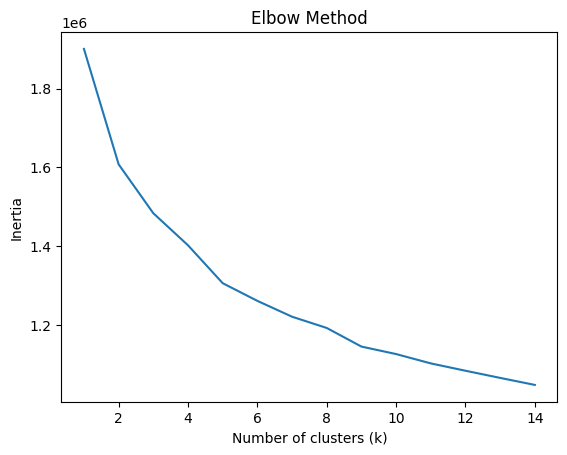

In [29]:
inertia = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init='auto', max_iter=300, random_state=42)
    kmeans.fit(X_train)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 15), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

Used `Elbow Method` to decide what k value to use. There is no point where there is a clear slow down in inertia drop. Decided on using `k = 4`.

As the `Sihouette Score Method` is computationally expensive, we will not use it here.

In [30]:
def create_cluster(dataset: pd.DataFrame, n_clusters: int = 5) -> pd.DataFrame:
    """
    Applies K-means clustering to the given dataset.
    Adds a new column 'cluster' indicating the cluster assignment.

    Args:
        dataset (pd.DataFrame): The DataFrame containing the data to be clustered.
        n_clusters (int): The number of clusters to form. Default is 5.

    Returns:
        pd.DataFrame: The original DataFrame with an additional 'cluster' column.
    """
    data = dataset.copy()
    
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=0)
    data['cluster'] = kmeans.fit_predict(data)
    return data

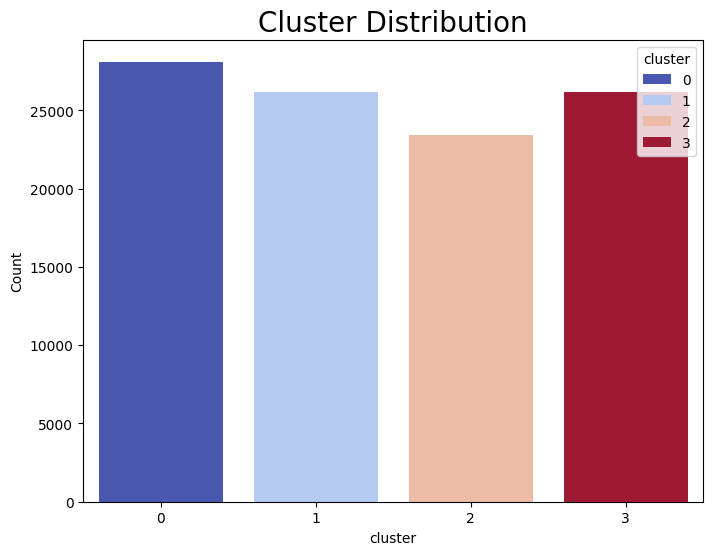

In [31]:
cluster_dataset = create_cluster(X_train, n_clusters=4)

barplot_feature(cluster_dataset, 'cluster', 'Cluster Distribution')

Kmeans clusters quite fairly distributed.

In [32]:
def plot_cluster_distributions(dataset, n_clusters=5, plot_type='boxplot'):
    """
    Plots distribution of all features for the specified number of clusters
    using either boxplot or violin plot.
    
    Args:
        dataset (DataFrame): The dataset containing the features.
        n_clusters (int): The number of clusters to form.
        plot_type (str): The type of plot to use ('boxplot' or 'violin').

    Returns:
        None: Shows boxplot or violin plot.
    """
    data = create_cluster(dataset, n_clusters)
    numeric_features = data.select_dtypes(include=[np.number]).columns.difference(['cluster'])

    num_rows = int(np.ceil(len(numeric_features) / 3))
    _, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 4))
    axes = axes.flatten()

    for i, feature in enumerate(numeric_features):
        if plot_type == 'boxplot':
            sns.boxplot(x='cluster', y=feature, data=data, ax=axes[i])
        elif plot_type == 'violin':
            sns.violinplot(x='cluster', y=feature, data=data, ax=axes[i])
        
        axes[i].set_title(f'{feature} by Cluster')
        axes[i].set_xlabel('Cluster')
        axes[i].set_ylabel(feature)

    for ax in axes[len(numeric_features):]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()

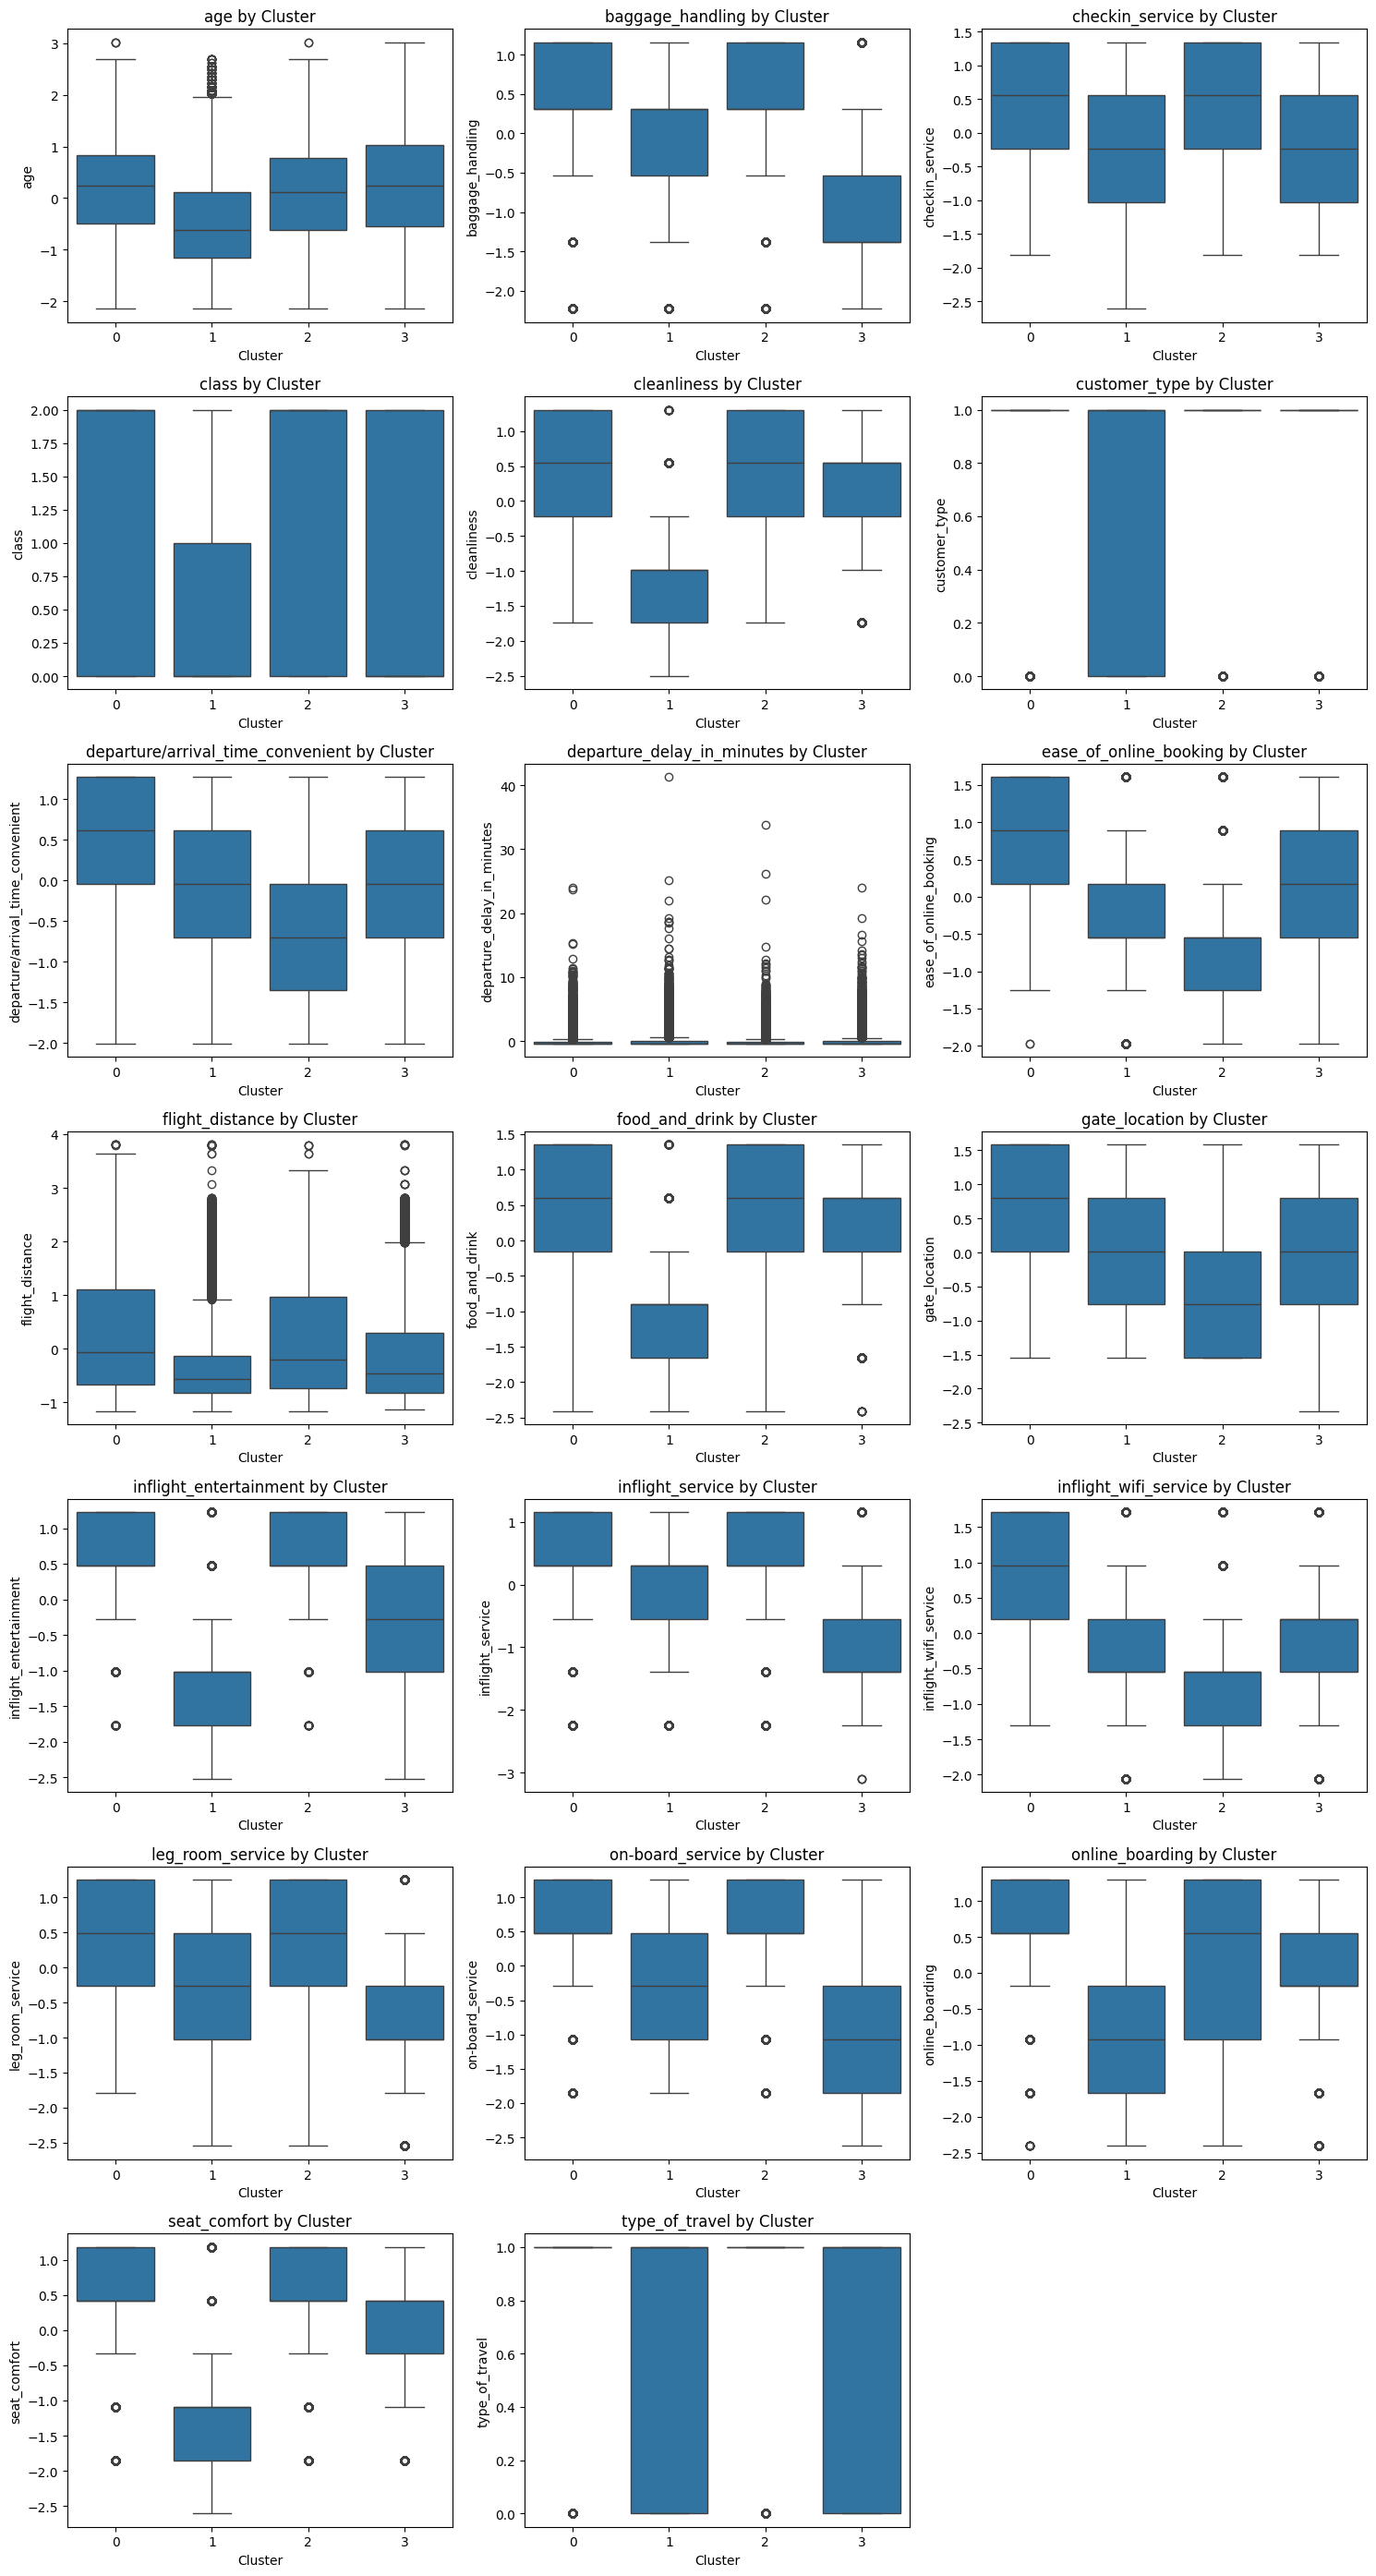

In [33]:
plot_cluster_distributions(X_train, 4, 'boxplot')

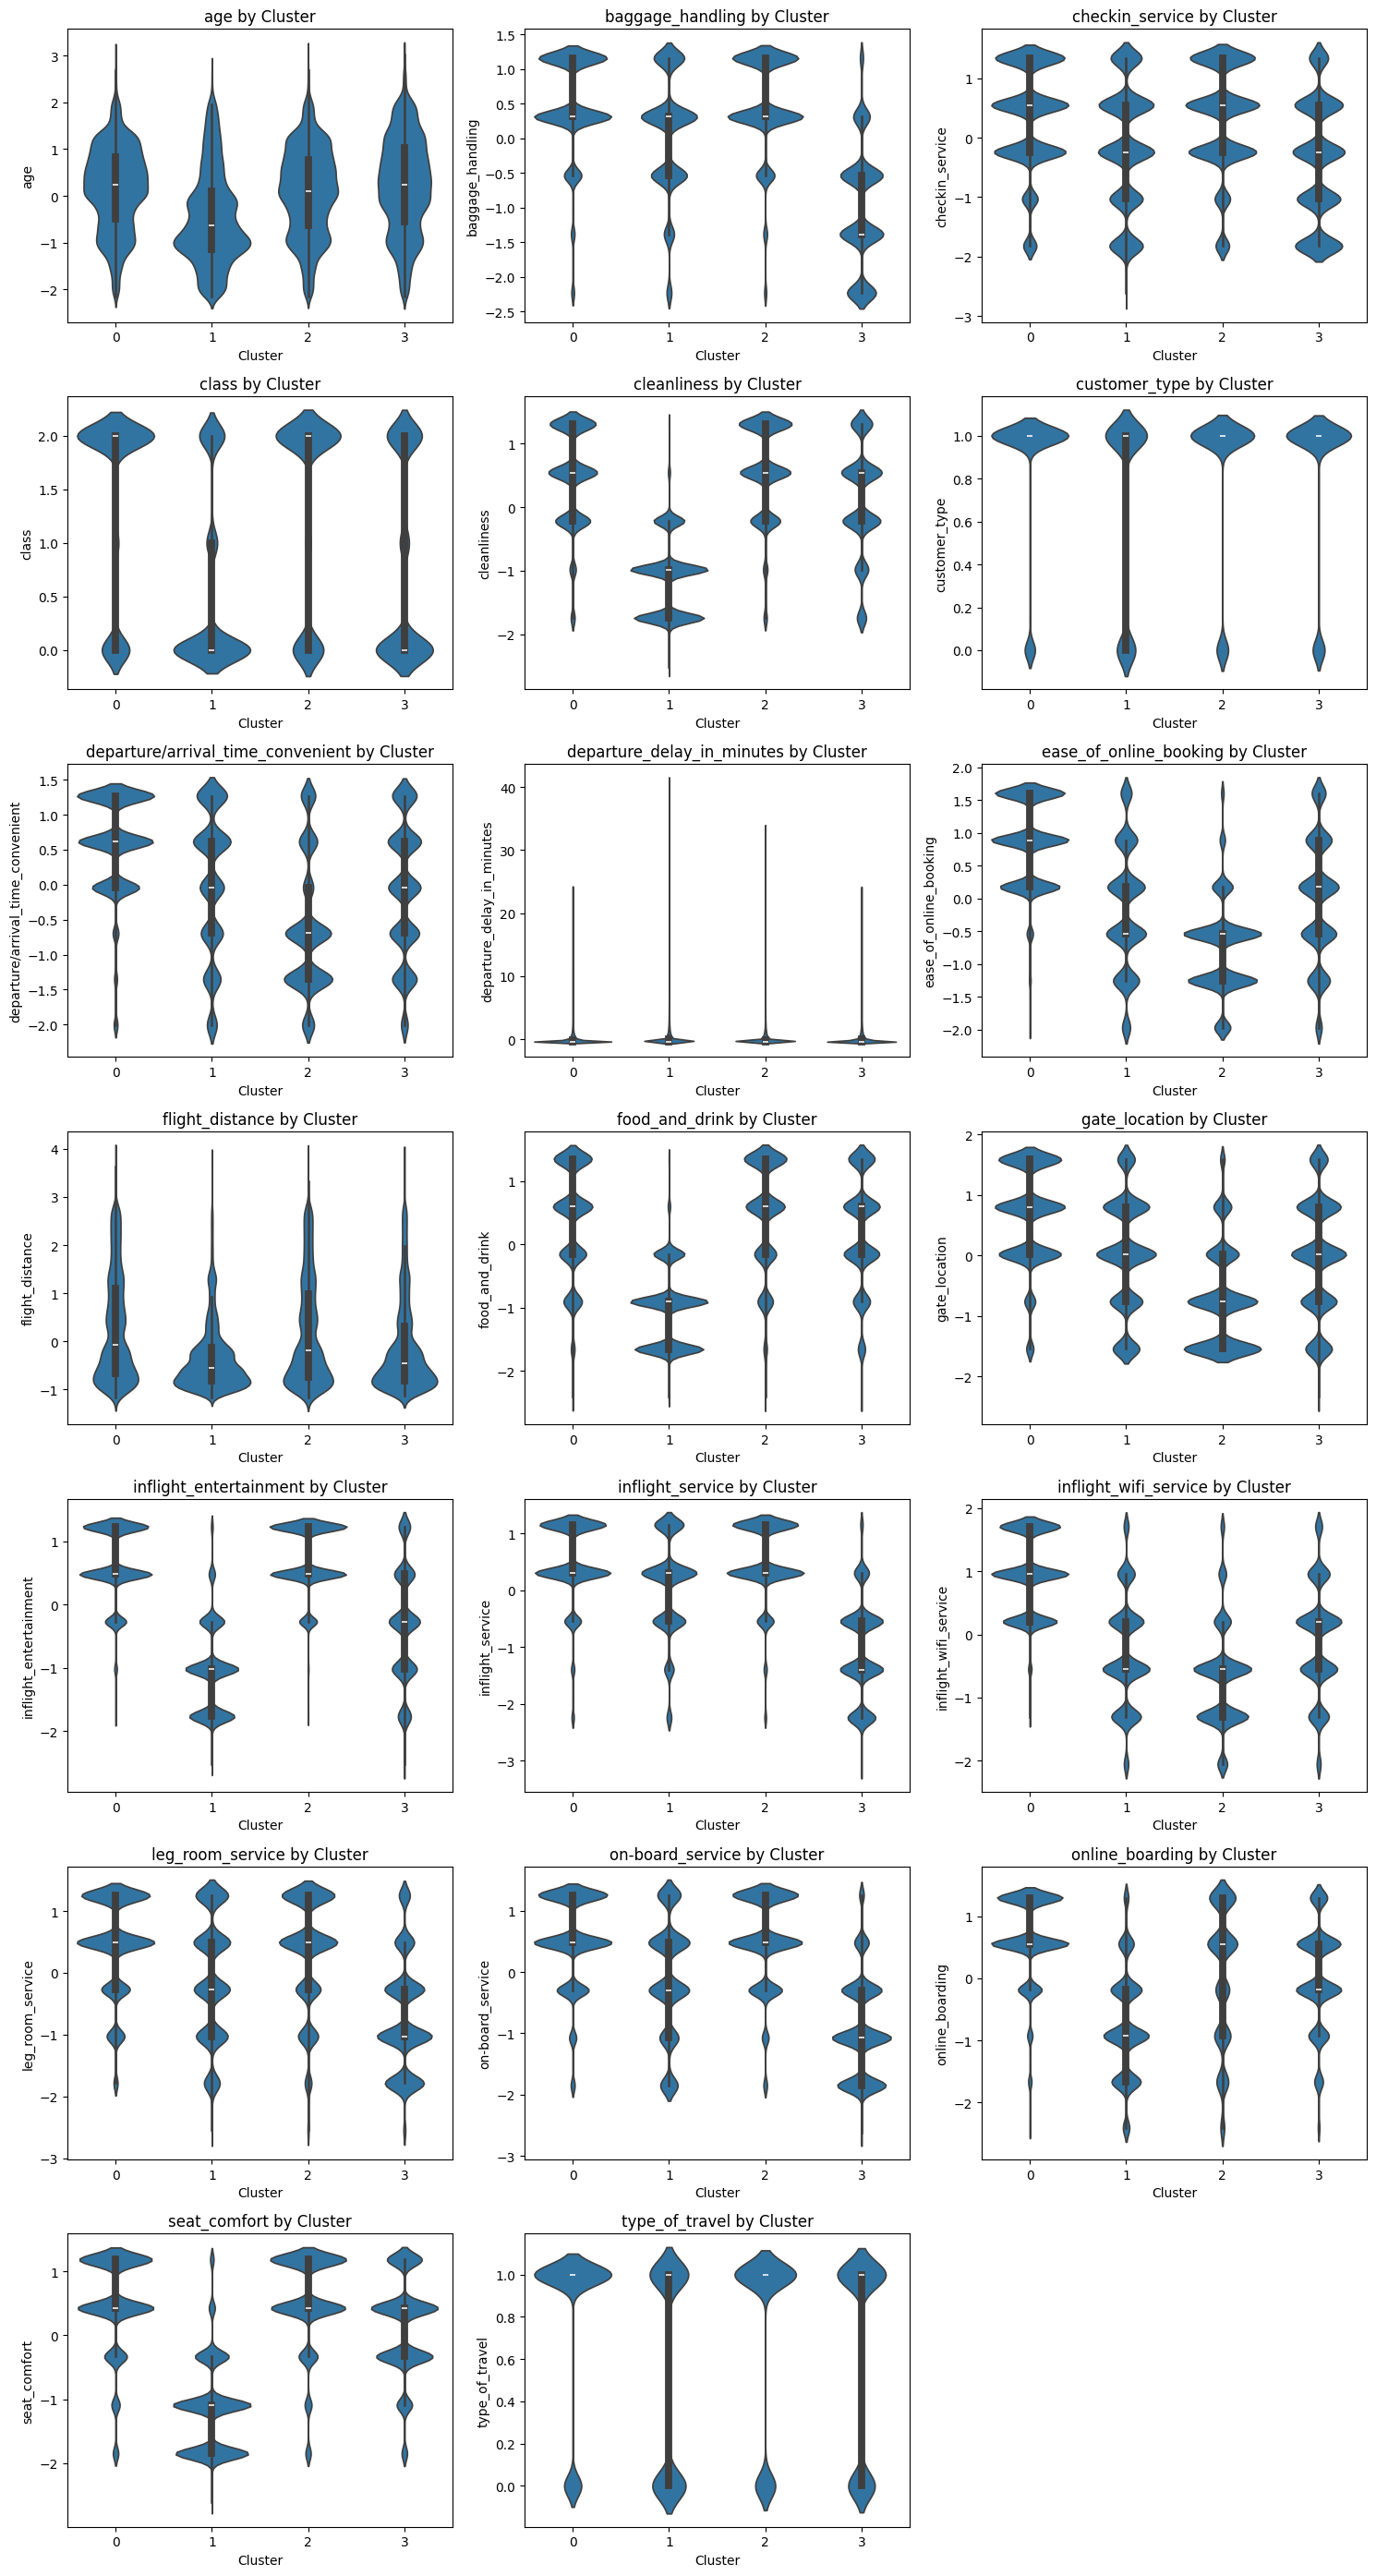

In [34]:
plot_cluster_distributions(X_train, 4, 'violin')

**Cluster 2** seems to standout from the others, being largely from Economy class. There is less cleaniness, food and drink, seat comfort, in-flight entertainment and poorer online boarding.

**Cluster 3** seems to group depature/arrival time convenience, ease of online booking, gate location and inflight wifi service together. It could possibly group features where there is less convenience together, especially pre and post flight.

## 3. PCA

In [35]:
def plot_cumulative_variance(X_train: pd.DataFrame, threshold: float = 95.0) -> None:
    """
    Computes and plots the cumulative explained variance by PCA components to determine 
    the number of components needed to explain a given percentage of the variance.

    Args:
        X_train (pd.DataFrame): The feature matrix from which to compute PCA.
        threshold (float, optional): The percentage of explained variance to aim for. Default is 95.0%.

    Returns:
        None: Displays a line plot of the cumulative explained variance.
    """
    # Perform PCA
    pca_plot = PCA()
    pca_plot.fit(X_train)

    # Calculate cumulative explained variance
    explained_var_cumsum = np.cumsum(pca_plot.explained_variance_ratio_) * 100

    # Setup x and y values for plotting
    x_values = np.insert(range(1, len(explained_var_cumsum) + 1), 0, 0)
    y_values = np.insert(explained_var_cumsum, 0, 0)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(x_values, y_values, marker='o')
    plt.title('Cumulative Explained Variance by PCA Components')
    plt.xlabel('Number of Dimensions')
    plt.ylabel('Cumulative Explained Variance (%)')
    plt.axhline(y=threshold, color='r', linestyle='--')
    plt.grid(True)

    plt.xticks(x_values)
    plt.xlim(0, len(explained_var_cumsum))
    
    plt.show()

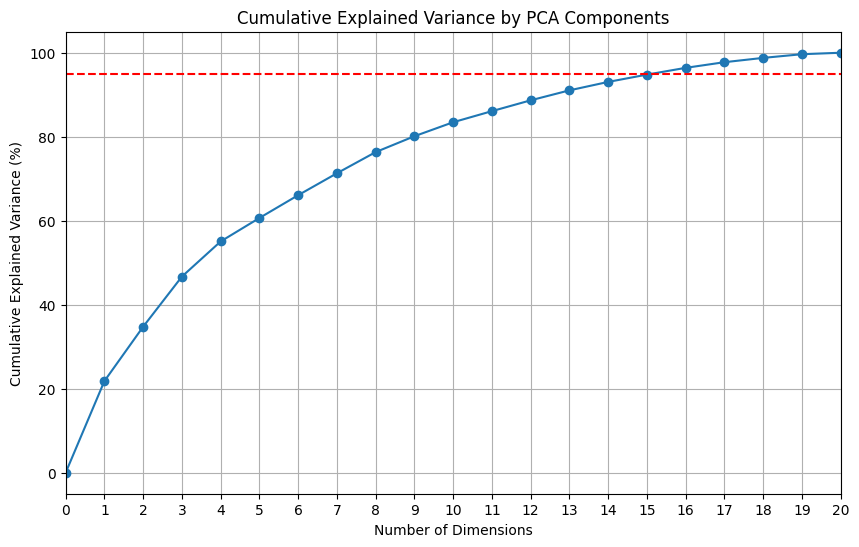

In [36]:
plot_cumulative_variance(X_train, threshold=95.0)

We plotted PCA of the remaining 20 features to know which best explain variance.

PCA allows us to reduce number of dimensions to 15 (25% decrease) while retaining 95% of the explained variance.

In [37]:
def plot_pca_heatmap(X_train: pd.DataFrame, n_components: int = 20) -> None:
    """
    Performs Principal Component Analysis (PCA) on the provided dataset.
    Plots a heatmap of the PCA loadings.
    Each row in the heatmap corresponds to a principal component.
    Each column represents a feature from the original dataset.

    Args:
        X_train (pd.DataFrame): The feature matrix from which PCA is to be computed.
        n_components (int, optional): The number of principal components to compute. Defaults to 20.

    Returns:
        None: Displays a heatmap of the PCA loadings.
    """
    pca = PCA(n_components=n_components)
    pca.fit(X_train)

    loadings = pca.components_
    features = X_train.columns

    loading_matrix = pd.DataFrame(loadings, columns=features, index=[f'PC{i}' for i in range(1, n_components + 1)])

    plt.figure(figsize=(12, 10))
    sns.heatmap(loading_matrix, cmap='coolwarm', annot=True, fmt=".2f", annot_kws={'size': 8})
    plt.title('PCA Components by Features')
    plt.xlabel('Features')
    plt.ylabel('Principal Components')
    plt.xticks(rotation=45, ha='right')
    plt.show()

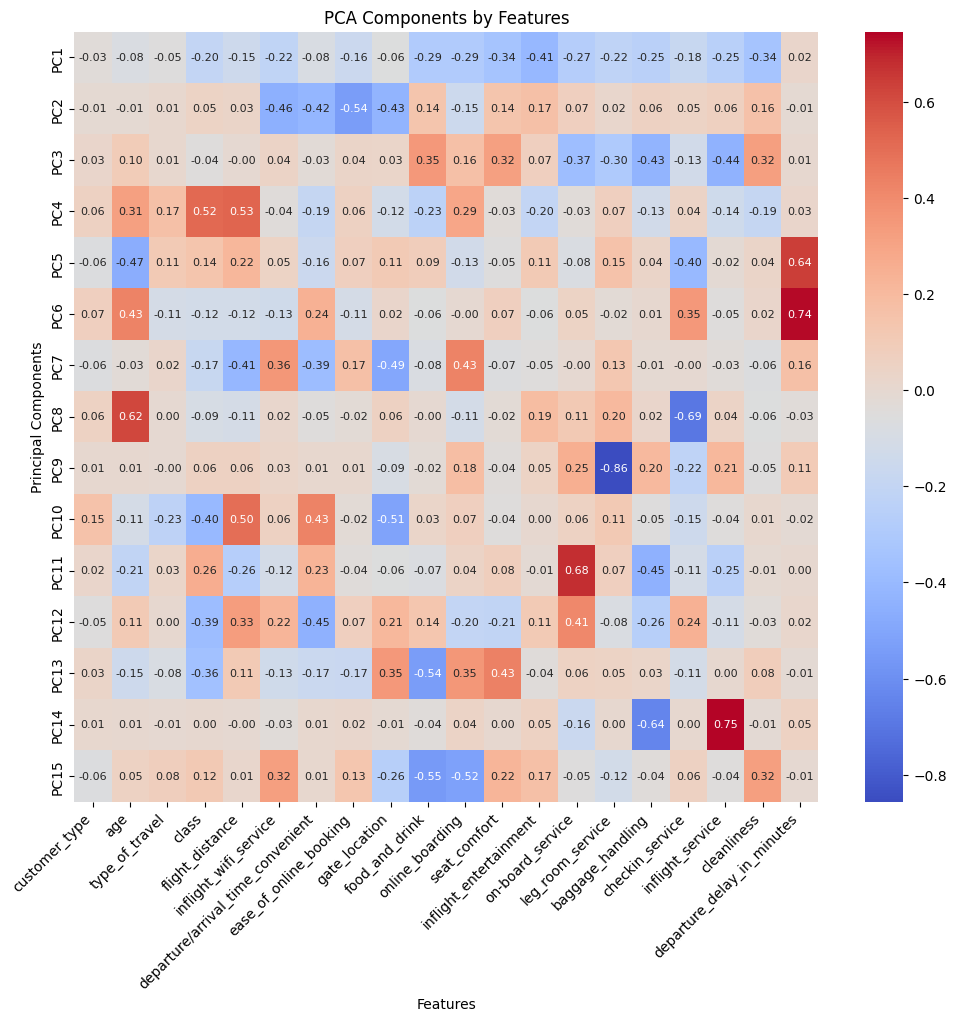

In [38]:
plot_pca_heatmap(X_train, n_components=15)

- **PC1** which explains the most variance contains many inflight experience features such as in-flight entertainment, cleaniness, seat comfort, food and drink. Also other convenience features like online boarding, onboarding etc in **PC2** and **PC1**. Inflight experience and pre/post flight convenience are likely major contributors to flight experience.
- Travel class and flight distance come next in **PC4**.
- Interestingly flight delays are not high up in the PCA dimensions, only contributing more in **PC5** and **PC6**.

## 4. Simple Logistic Regression

For this small scale experiment, we will not convert to numpy for computational gains.

In [39]:
def simple_logistic_regression(X_train: pd.DataFrame, y_train: pd.Series,
                               X_test: pd.DataFrame, y_test: pd.Series) -> None:
    """
    Trains a logistic regression model on the training data.
    Evaluates it using the test data.

    Args:
        X_train (pd.DataFrame): The feature matrix for the training data.
        y_train (pd.Series): The labels for the training data.
        X_test (pd.DataFrame): The feature matrix for the test data.
        y_test (pd.Series): The labels for the test data.

    Returns:
        None: Outputs accuracy and F1 score directly.
    """
    log_reg = LogisticRegression()
    log_reg.fit(X_train, y_train)

    y_pred = log_reg.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f'Accuracy: {accuracy:.2f}')
    print(f'F1 Score: {f1:.2f}')

In [40]:
simple_logistic_regression(X_train, y_train, X_test, y_test)

Accuracy: 0.87
F1 Score: 0.85


In [41]:
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

simple_logistic_regression(X_train_pca, y_train, X_test_pca, y_test)

Accuracy: 0.84
F1 Score: 0.81


Performed a quick and simple logistic regression with accuracy of 87% and F1 of 85%. 

Unfortunately Logistic regression with the PCA performed worse by 3-4% score.

## 5. Summary

**Findings**
- K-means and PCA managed to group features into broad inflight experience and pre/post flight convenience categories.
- From K-means and PCA, it seems that inflight experience as well as pre/post flight convenience all play a big part in the flight experience. There is *no one single* important factor.
- Flight delays are lower in importance than expected.

**Limitations**
- Cost of travel was not considered here. It could be that passengers are satisfied with the service for the cost they pay (e.g. cheaper economy tickets).

**Further works**
- More detailed EDA
- Experimentation of dropping / manually combining features as hinted by PCA (e.g. cleaniness, in-flight entertainment etc)
- Other unsupervised learning e.g. hierarchical clustering or other models e.g. SVM, Random Forest
- Cross validation and tuning of hyperparameters, including random search tuning of PCA number of dimensions.